In [1]:
import pandas as pd
import numpy as np

In [10]:
import scipy.stats as stats  # to plot QQ Plot

import matplotlib.pyplot as plt
import seaborn as  sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [31]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

In [42]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [44]:
df['Age'].fillna(df['Age'].mean(),inplace=True)


C:\Users\keval\AppData\Local\Temp\ipykernel_1692\1275544653.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [51]:
x = df.iloc[:,[1,2]]
y = df.iloc[:,0]

In [52]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

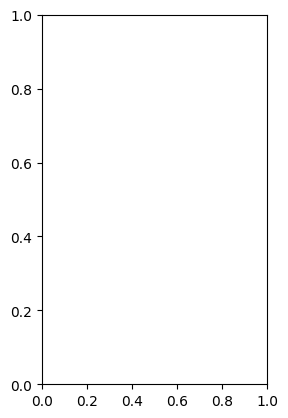

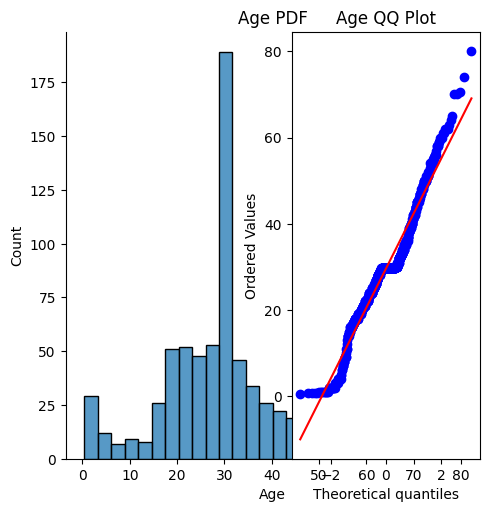

In [67]:
plt.subplot(121)
sns.displot(xtrain['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(xtrain['Age'], dist='norm',plot=plt)
plt.title('Age QQ Plot')
plt.show()


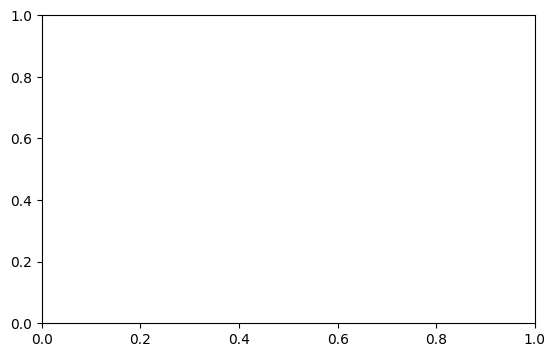

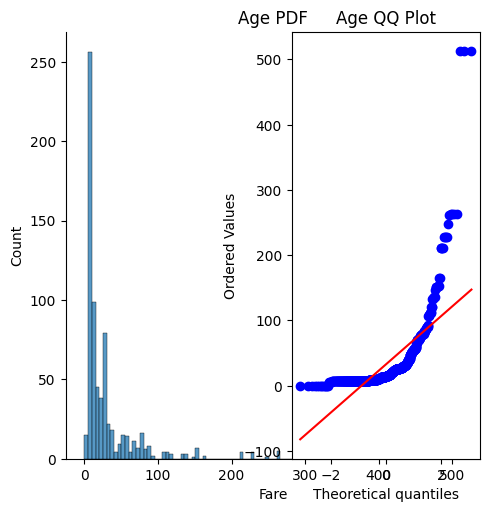

In [70]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.displot(xtrain['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(xtrain['Fare'], dist='norm',plot=plt)
plt.title('Age QQ Plot')
plt.show()


In [103]:
trf = FunctionTransformer(func=np.log1p)

In [104]:
xtrain = trf.fit_transform(xtrain)
xtest = trf.fit_transform(xtest)

In [105]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [114]:
clf.fit(xtrain,ytrain)
clf2.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [107]:
ypred = clf.predict(xtest)
ypred2= clf2.predict(xtest)

In [108]:
accuracy_score(ytest,ypred)


0.5921787709497207

In [109]:
accuracy_score(ytest,ypred2)

0.6759776536312849

In [113]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),[1])],remainder='passthrough')
xtrain = trf2.fit_transform(xtrain)
xtest = trf2.fit_transform(xtest)

In [115]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [116]:
clf.fit(xtrain,ytrain)
clf2.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [117]:
ypred = clf.predict(xtest)
ypred2= clf2.predict(xtest)

In [118]:
accuracy_score(ytest,ypred)


0.5921787709497207

In [119]:
accuracy_score(ytest,ypred2)

0.6703910614525139